In [7]:
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
data=pd.read_csv("mail_data.csv")

In [17]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# EDA

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [23]:
data.duplicated().sum()

415

In [32]:
data=data.drop_duplicates()#droping duplicates

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [40]:
data["Category"].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

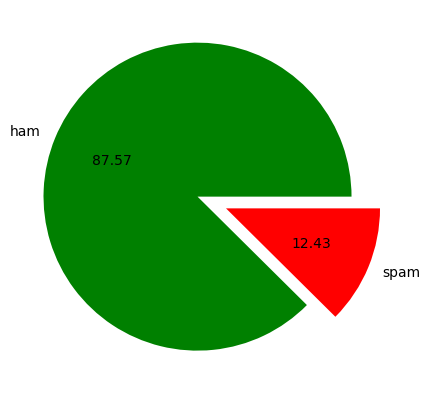

In [42]:
plt.figure(figsize=(9, 5))
plt.pie(data['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f', colors=['Green', 'Red'], explode = [.1, .1])
plt.show()

In [46]:
data["Message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bojja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [50]:
data["num_characters"]=data["Message"].apply(len)
data

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [68]:
ss=(data["num_characters"]==0).sum()
print(ss)

0


In [70]:
# For a number of words
from nltk.tokenize import word_tokenize
data['Message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [72]:
data['num_words']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [76]:
# For a number of sentences
data['num_sentences']=data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data

,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,Will ü b going to esplanade fr home?,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [84]:
data[data["Category"]=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [86]:
data[data["Category"]=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

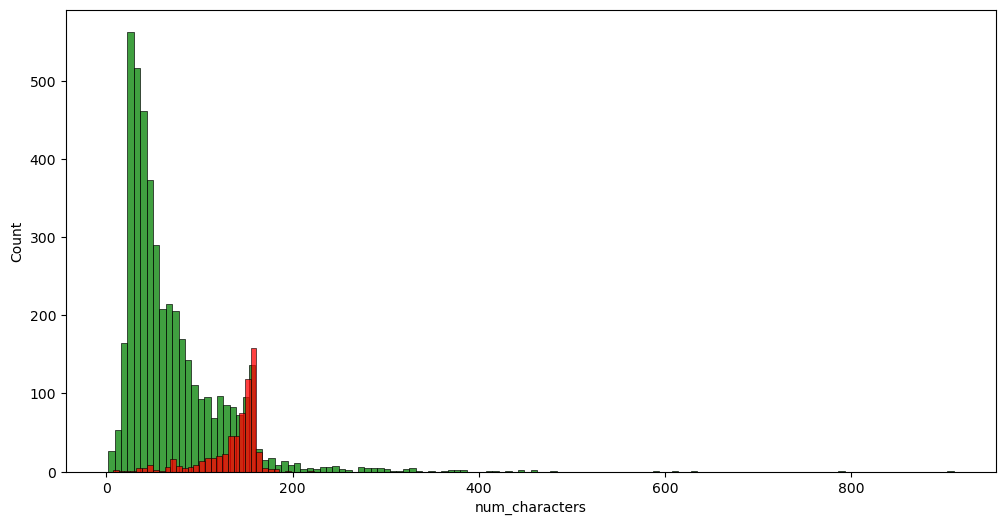

In [90]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category']=='ham']['num_characters'],color='green')
sns.histplot(data[data['Category']=='spam']['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

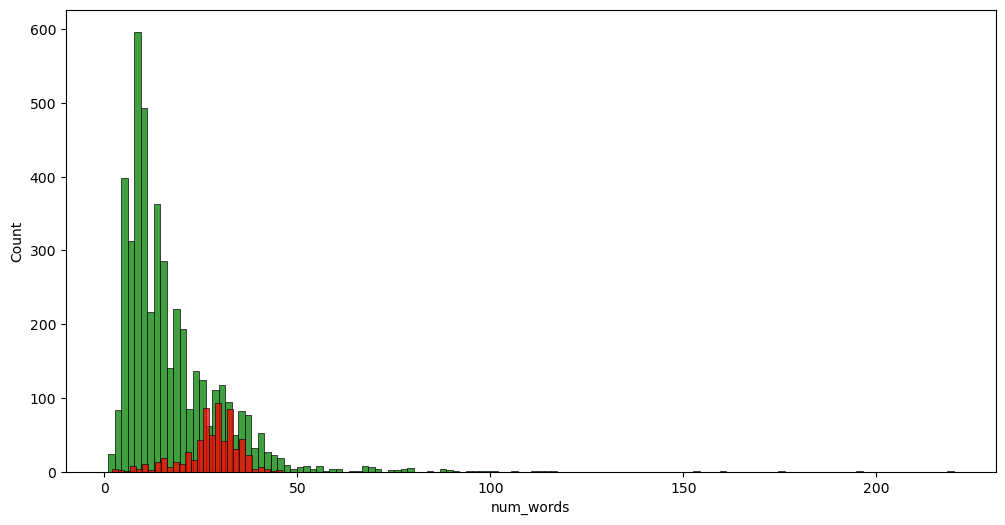

In [92]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category']=='ham']['num_words'],color='green')
sns.histplot(data[data['Category']=='spam']['num_words'],color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

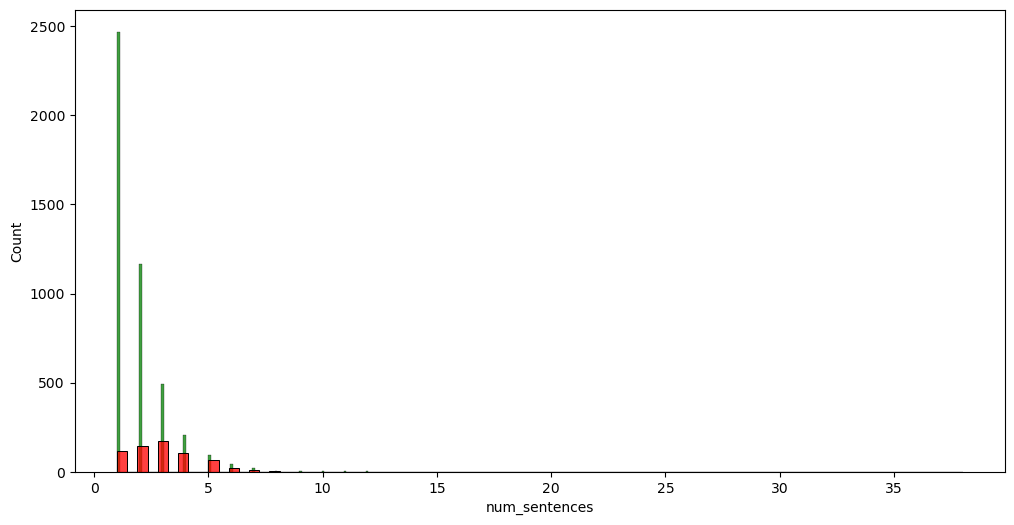

In [94]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category']=='ham']['num_sentences'],color='green')
sns.histplot(data[data['Category']=='spam']['num_sentences'],color = 'red')

In [96]:
!pip install wordcloud

In [98]:
from wordcloud import WordCloud

In [104]:
ham_msg_text = data[data.Category == 'ham'].Message
spam_msg_text = data[data.Category == 'spam'].Message

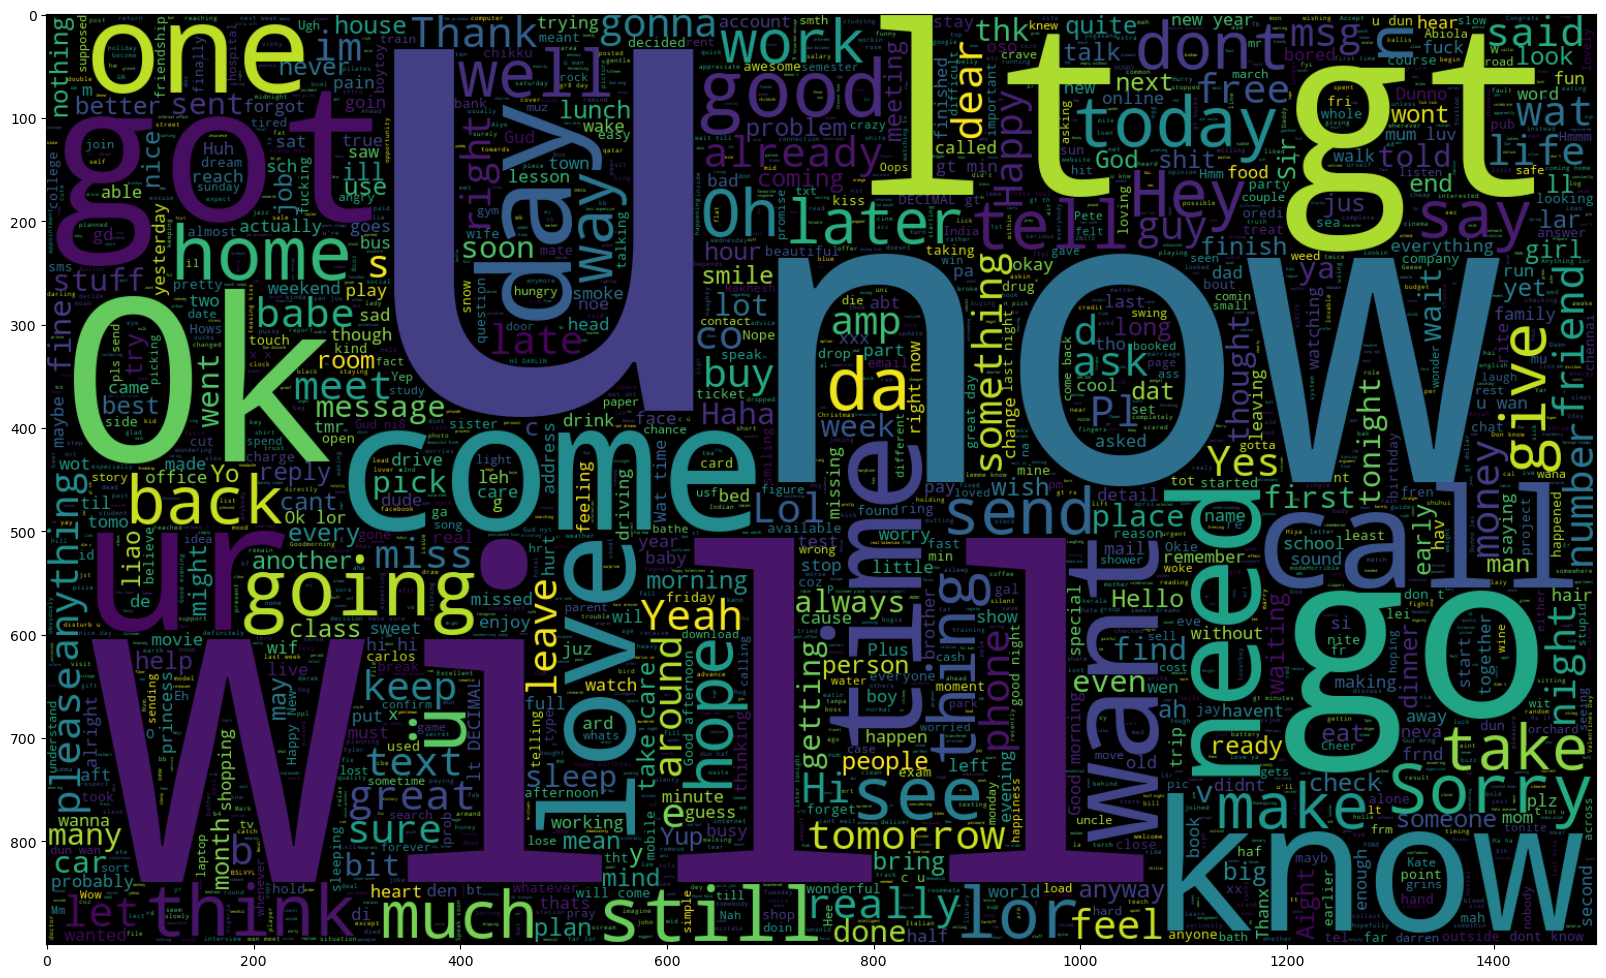

In [106]:
plt.figure(figsize = (20, 22))
wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(ham_msg_text))
plt.imshow(wc, interpolation='bilinear')

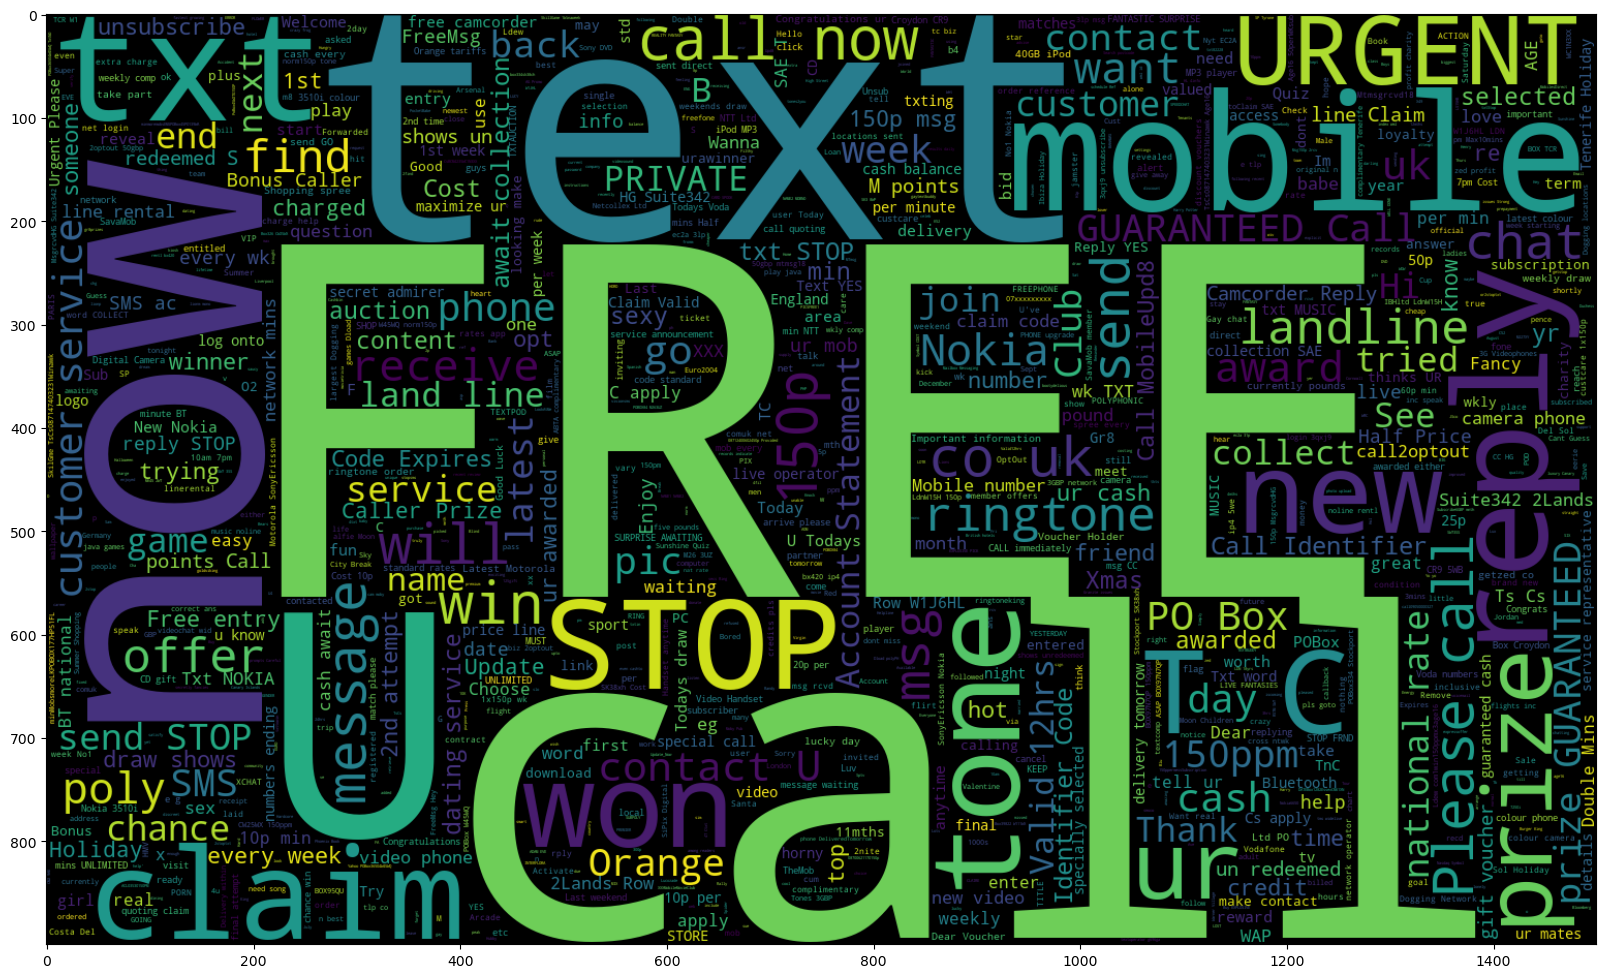

In [108]:
plt.figure(figsize = (20, 22))
wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(spam_msg_text))
plt.imshow(wc, interpolation='bilinear')

In [110]:
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [114]:
data["Message"]=data["Message"].apply(remove_punc)

In [116]:
def remove_noise(text):
  t = re.sub('[^a-zA-Z]', ' ', text)
  return t

In [118]:
data["Message"]=data["Message"].apply(remove_noise)

In [120]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bojja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [124]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [126]:
len(sw)

179

In [128]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [130]:
data["Message"]=data["Message"].apply(remove_sws)

In [132]:
data["Message"][8]

'winner valued network customer selected receivea prize reward claim call claim code kl valid hours'

In [134]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bojja\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bojja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bojja\AppData\Roaming\nltk_data...


True

In [138]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [140]:
data["Message"]=data["Message"].apply(lemma)

In [142]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,ham,go jurong point crazy available bugis n great ...,111,24,2
1,ham,ok lar joking wif u oni,29,8,2
2,spam,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,ham,u dun say early hor u c already say,49,13,1
4,ham,nah dont think go usf life around though,61,15,1


In [144]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
data['Category']=encoder.fit_transform(data['Category'])
data

,Category,Message,num_characters,num_words,num_sentences
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah dont think go usf life around though,61,15,1
...,...,...,...,...,...
5567,1,nd time tried contact u u pound prize claim ea...,160,35,4
5568,0,b going esplanade fr home,36,9,1
5569,0,pity mood soany suggestion,57,15,2
5570,0,guy bitching acted like id interested buying s...,125,27,1


In [148]:
data1=data[['Category','Message']]
data1.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [152]:
X = tf.fit_transform(data['Message']).toarray()
y = data['Category']

In [156]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [160]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

# Model Building

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [165]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4125, 3000), (1032, 3000), (4125,), (1032,))

In [167]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [169]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [171]:
mlf = MultinomialNB()
mlf.fit(X_train, y_train)

MultinomialNB()

In [173]:
y_pred = clf.predict(X_test)
ym_pred = mlf.predict(X_test)

In [175]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9757751937984496


In [177]:
print("Accuracy Score: ", accuracy_score(y_test, ym_pred))

Accuracy Score:  0.9699612403100775


In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       915
           1       0.99      0.79      0.88       117

    accuracy                           0.98      1032
   macro avg       0.98      0.90      0.93      1032
weighted avg       0.98      0.98      0.97      1032



In [181]:
print(classification_report(y_test, ym_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       915
           1       1.00      0.74      0.85       117

    accuracy                           0.97      1032
   macro avg       0.98      0.87      0.92      1032
weighted avg       0.97      0.97      0.97      1032



Text(120.72222222222221, 0.5, 'Truth')

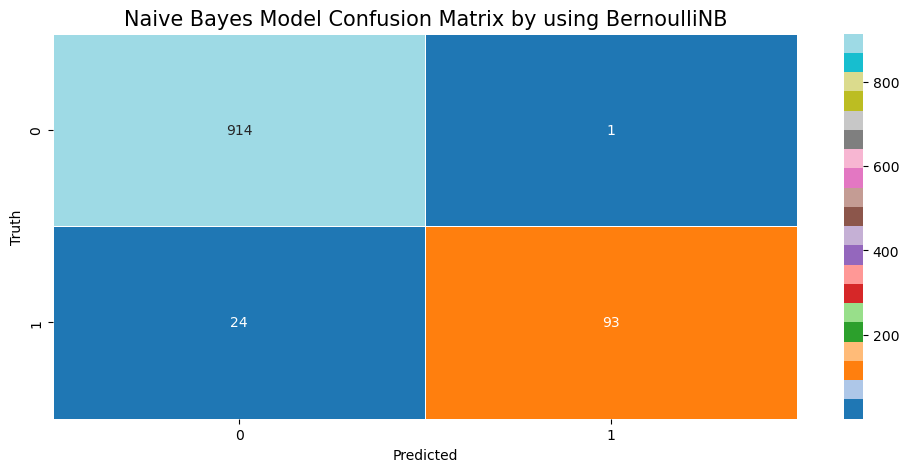

In [187]:
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Naive Bayes Model Confusion Matrix by using BernoulliNB', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(120.72222222222221, 0.5, 'Truth')

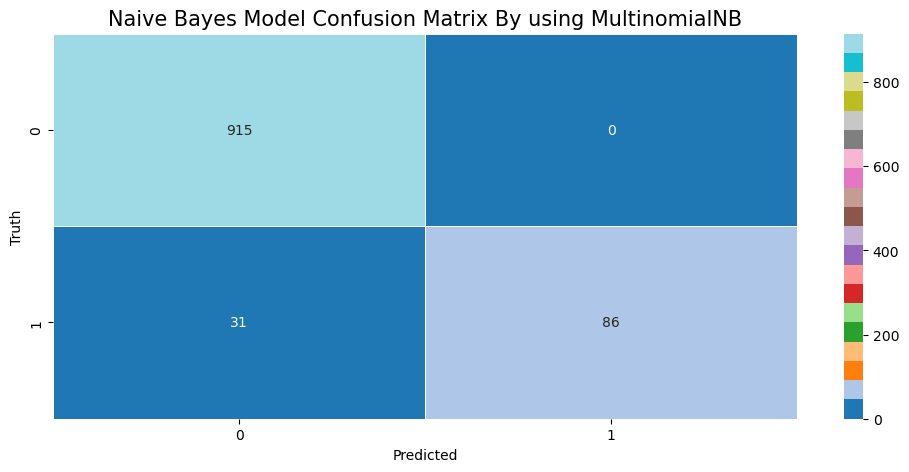

In [189]:
import seaborn as sn
cm = confusion_matrix(y_test, ym_pred)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Naive Bayes Model Confusion Matrix By using MultinomialNB', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')